# Plotting and analysing results from running evensen2009

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import matplotlib.pyplot as plt

import numpy as np

from dapper.mods.LA.evensen2009 import HMM
import dapper.da_methods as da

/Users/fedacuric/git/DAPPER/dapper/tools/progressbar.py:149: UserWarning: Keyboard interaction (to skip/stop/pause the liveplotting) does not work in the current python frontend. If you wish, you can use dpr_config.yaml to disable the liveplotting altogether, which will silence this message.
  _interaction_impossible()


In [3]:
xx, yy = HMM.simulate()

In [4]:
# Points in space at which measurements were taken,
# perhaps this should be part of the HMM-object?
jj = np.linspace(0, HMM.Nx, HMM.Ny, endpoint=False, dtype=int)

## Plotting synthetic truth and measurements at t=0 and t=T

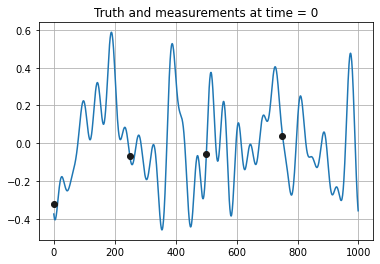

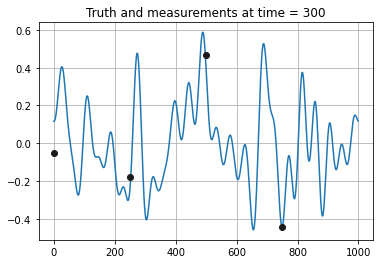

In [5]:
fig, ax = plt.subplots()
t = 0
ax.plot(xx[t, :])
ax.plot(jj, yy[t, :], "ko")
ax.set_title(f"Truth and measurements at time = {t}")
ax.grid();

fig, ax = plt.subplots()
t = HMM.tseq.T
ax.plot(xx[t, :])
ax.plot(jj, yy[int(HMM.tseq.T / HMM.tseq.dko) - 1, :], "ko")
ax.set_title(f"Truth and measurements at time = {t}");
ax.grid();

## Compare analysed with true solution at different times

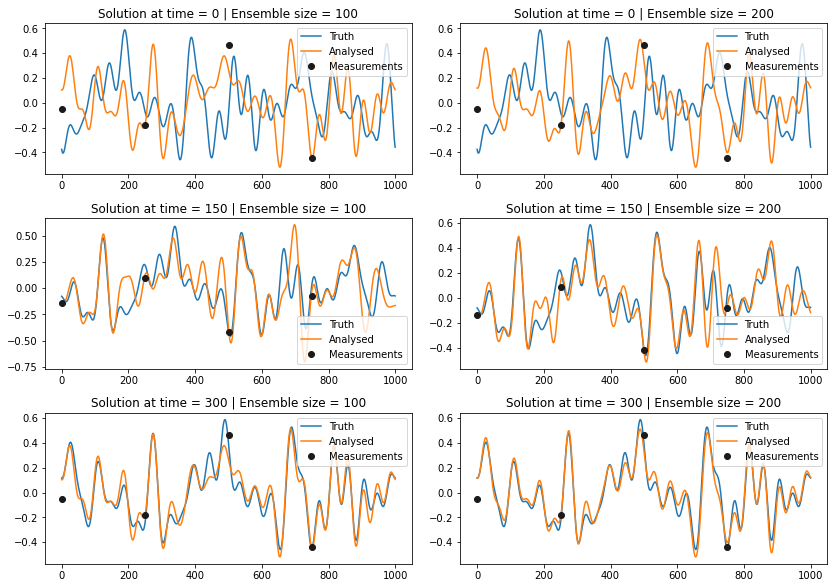

In [6]:
ensemble_sizes = (100, 200)
times = (0, HMM.tseq.T // 2, HMM.tseq.T)
fig, ax = plt.subplots(nrows=len(times), ncols=len(ensemble_sizes))
fig.set_size_inches(11.69, 8.27) # Size of A4
for iN, N in enumerate(ensemble_sizes):
    xp = da.EnKF("PertObs", N=N, infl=1.02)
    xp.assimilate(HMM, xx, yy, label="hei", fail_gently=False, store_u=True)

    # Plotting analysed solution with true solution at different times and ensemble sizes
    for it, t in enumerate(times):
        ax[it, iN].plot(xx[t, :], label="Truth")
        ax[it, iN].plot(xp.stats.mu.a[t // HMM.tseq.dko - 1, :], label="Analysed")
        ax[it, iN].plot(jj, yy[t // HMM.tseq.dko - 1, :], "ko", label="Measurements")
        ax[it, iN].set_title(f"Solution at time = {t} | Ensemble size = {N}")
        ax[it, iN].legend();
fig.tight_layout()
fig.savefig("ensemble.pdf");